## Contexte
Le BRGM dispose de mesures de nombreux paramètres concernant les [aquifères](https://sigesaqi.brgm.fr/-Hydrogeologie-.html).  
Les principaux paramètres sont le [niveau d'eau](https://hubeau.eaufrance.fr/page/api-piezometrie), les [caractéristiques chimiques](https://hubeau.eaufrance.fr/page/api-qualite-nappes).  
En complément, le BRGM dispose également de mesures de la **température** de l'eau souterraine, sur plusieurs centaines de puits en France. Ces données sont mesurées à divers endroits en France, dans des puits, forages ou sources. Ces "fenêtres sur l'aquifère" portent tous un numéro d'identification unique : le bss_id. Pour chaque puits (donc chaque bss_id), un certains nombre de descripteurs permettent de préciser i) les caractéristiques du puits : coordonées, altitutde, profondeur du puits,... et ii) les caractéristiques du [réservoir aquifère](https://bdlisa.eaufrance.fr/).

Les données de température sont pour autant encore mal structurées et ne sont pas encore dans une base de donnée dédiées, mais gérées pour le moment comme un système de fichiers. De ce fait, la profondeur du capteur dans le puits, ou les caractéristiques du réservoir aquifère ne sont pas toujours stockées dans un format facilement requêtable.

Les données issues des capteurs de température n'ont par ailleurs subit aucun processus de validation, il faut donc considérer ces données comme des données brutes, comportant potentielement des erreurs.

En complément, le BRGM est également en capacité de fournir des données météorologiques associées à ces différents puits.

## Défis proposé par le BRGM
Dans le contexte exposé auparavant, le défi que le BRGM propose consiste à prendre en charge un sous ensemble de ce jeu de donnée (quelques dizaines de puits) et à l'explorer. Un travail de croisement de plusieurs référentiels sera par exemple nécessaire pour associer chaque série temporelle avec un réservoir aquifère (ou un type de réservoir, ex: des calcaires ou des sables), ou avec les caractéristiques liées au puits. Il s'agit par la suite de réaliser une exploration du jeu de données pour en faire ressortir les caractéristiques les plus intéressantes, et accompagner le BRGM pour faire émerger des pistes de réflexion sur les signaux portés par ces données.
Il s'agira donc par exemple préciser le nombre de capteurs, les périodes de disponibilités des données, les gammes de variations des valeurs, d'identifier les valeurs manquantes, d'identifier des anomalies, proposer des corrections sur les données brutes là ou ce sera jugé nécessaire.
En seconde étape, il est proposé d'explorer la variabilité temporelle de la température, la variabilité spatiale ou selon la profondeur, et de croiser ces informations avec des informations exogènes : type de puits, type d'aquifère, profondeur des capteurs, régime climatique, régime de pluie,etc.
Des approches par regroupement (clustering) pourraient également être conduites, soit de façon non supervisée, de sorte à identifier les paramètres discriminants permettant d'isoler des comportements différents, soit de façon supervisée, en explorant la variabilité des signaux au sein d'un même type d'aquifère par exemple.
Enfin, des approches de modélisation pourraient être conduites, de sorte à proposer des modèles d'évolution de la température en fonction de variables exogènes (pluie, température de l'air, etc.).

## Premier aperçus des données
Un court apercu des données est fourni dans la suite du notebook, pour permettre aux candidats de mieux aprécier le périmètre du défi.

In [15]:
from pandas import HDFStore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# modifier MAIN_DIR pour pointer vers le bon dossier
MAIN_DIR=r'D:\Documents\henriot\OneDrive - BRGM\10_D3E\04_transverse\2022_capteurs_temperature\03_share'
DATA_DIR='data'
FILE='temperature_dataset.h5'


In [59]:
# les données sont stockés en hdf5
ds=HDFStore(Path(MAIN_DIR)/Path(DATA_DIR)/FILE)

In [60]:
# quelques infos sur le fichier :
ds.groups() # pour l'exemple, le fichier ne contient qu'un seul groupe, pour le défi, plusieurs régions seront mises à disposition, stockées dans des groupes séparés

[/haute_garonne (Group) ''
   children := ['table' (Table)]]

In [61]:
# les données sont stockées au sein de chaque groupe sous forme d'une DataFrame (library pandas)
ds['/haute_garonne'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98796 entries, 0 to 24311
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         90043 non-null  datetime64[ns]
 1   temperature      98796 non-null  float64       
 2   fichier_origine  98796 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.0+ MB


In [62]:
# chaque group contient des attributs :
ds.get_storer('/haute_garonne').attrs

/haute_garonne._v_attrs (AttributeSet), 16 attributes:
   [CLASS := 'GROUP',
    TITLE := '',
    VERSION := '1.0',
    data_columns := [],
    encoding := 'UTF-8',
    errors := 'strict',
    index_cols := [(0, 'index')],
    info := {1: {'names': [None], 'type': 'Index'}, 'index': {}, 'values_block_0': {}, 'values_block_1': {}, 'values_block_2': {}},
    levels := 1,
    metadata := {'DESCRIPTION': 'pandas dataframe contenant les valeurs de temperature pour le département haute garonne', 'attributs': 'datetime: date et heure de la mesure, au format datetime64[ns], temperature : valeur de la mesure de la température, en °C, fichier_origine : fichier d origine d ou ont été extraites les valeurs'},
    nan_rep := 'nan',
    non_index_axes := [(1, ['datetime', 'temperature', 'fichier_origine'])],
    pandas_type := 'frame_table',
    pandas_version := '0.15.2',
    table_type := 'appendable_frame',
    values_cols := ['values_block_0', 'values_block_1', 'values_block_2']]

In [63]:
# la clé 'metadata' des attributs permet de décrire ce qui est contenu dans la dataframe
ds.get_storer('/haute_garonne').attrs.metadata

{'DESCRIPTION': 'pandas dataframe contenant les valeurs de temperature pour le département haute garonne',
 'attributs': 'datetime: date et heure de la mesure, au format datetime64[ns], temperature : valeur de la mesure de la température, en °C, fichier_origine : fichier d origine d ou ont été extraites les valeurs'}

In [64]:
# on se propose d'explorer rapidement le contenu du group 'haute_garonne'
df_hg=ds['/haute_garonne']
print(type(df_hg)) # <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [65]:
# qq données
df_hg.head()

datetime  temperature        fichier_origine
0 2021-04-28 16:12:00        0.000  ARBAS_10733X0027.xlsx
1 2021-04-29 14:00:00        9.195  ARBAS_10733X0027.xlsx
2 2021-04-30 02:00:00        9.103  ARBAS_10733X0027.xlsx
3 2021-04-30 14:00:00        9.052  ARBAS_10733X0027.xlsx
4 2021-05-01 02:00:00        8.960  ARBAS_10733X0027.xlsx

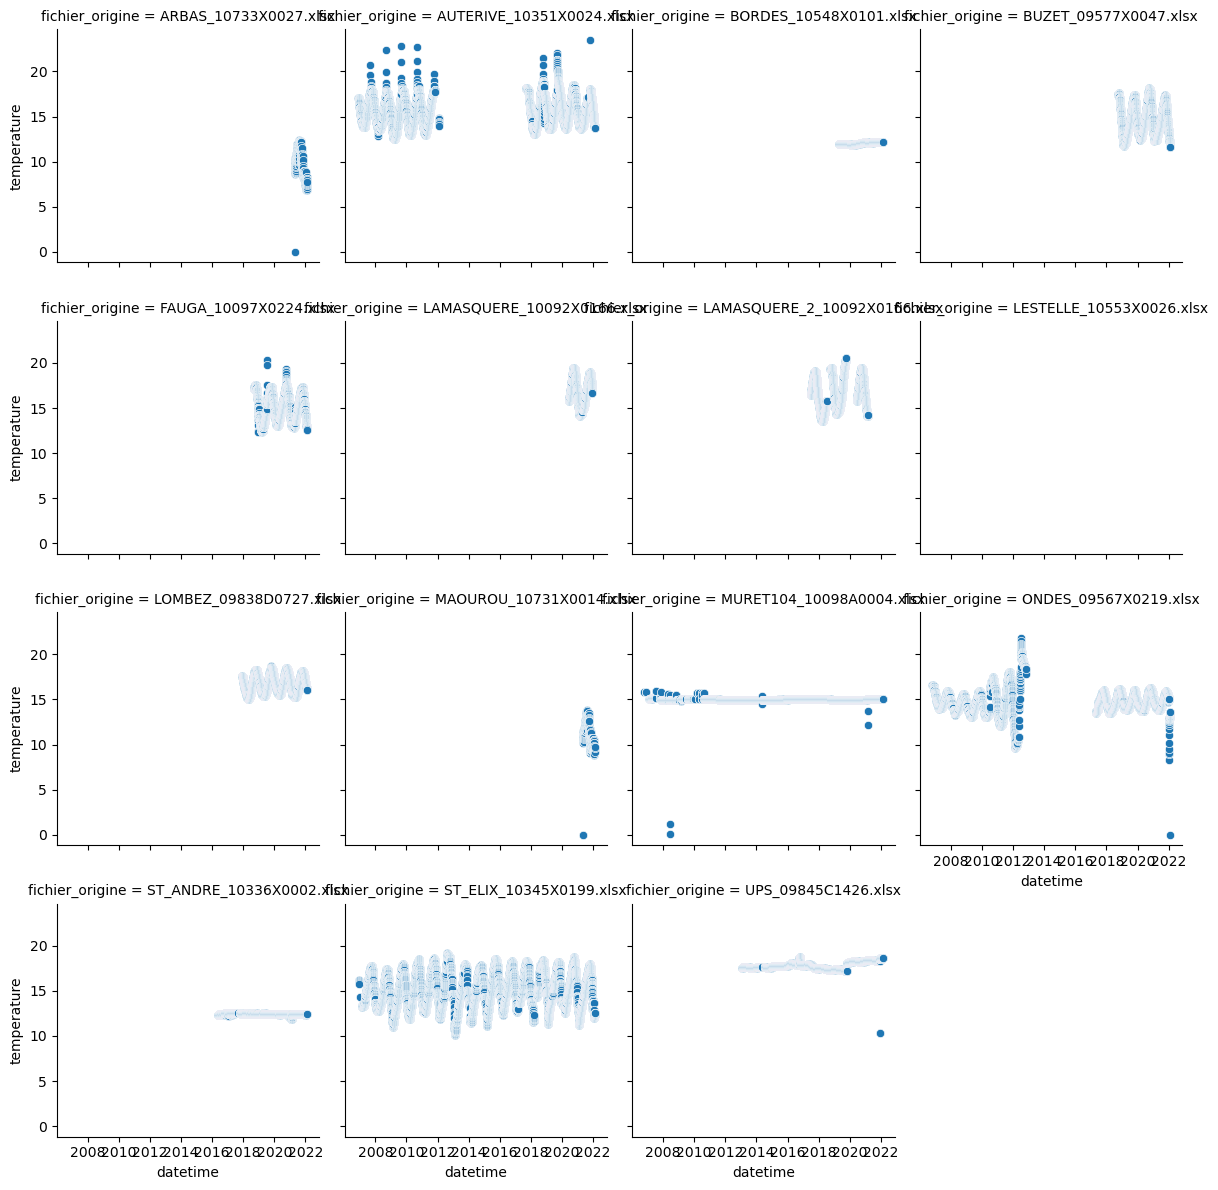

In [68]:
# qq graphs
wells_list=list(set(df_hg['fichier_origine']))
graph=sns.FacetGrid(df_hg, col='fichier_origine',col_wrap=4)
graph=graph.map_dataframe(sns.scatterplot, x='datetime',y='temperature')
graph.add_legend()

In [69]:
# ne pas oublier de fermer la connexion vers le stockage hdf
ds.close()